## Coding activity 5: $K$-fold Cross Validation

In [2]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def r(x):
    """A convenience function to compute values of r."""
    return 0.5*x*np.cos(4*np.pi*x)

def make_y(x):
    """A convenience function to sample from N(r(x), 0.1)."""
    return r(x) + 0.1*np.random.normal(size=len(x))

- Find the values of $k$ that minimnize the $3$-, $5$-, and $10$-fold cross validation scores.
    Compute these scores using `cross_val_score` from `sklearn.model_selection`. For details, see <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">the docs</a>.

- Include the keyword argument `scoring='neg_mean_squared_error'` when calling `cross_val_score`.
    
- Confirm your results from coding activity 4 by performing LOOCV as $n$-fold cross validation, $n$ being the size of the dataset.

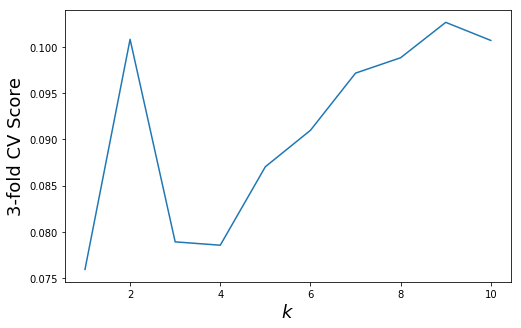

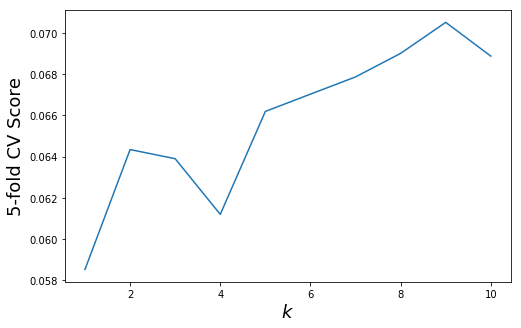

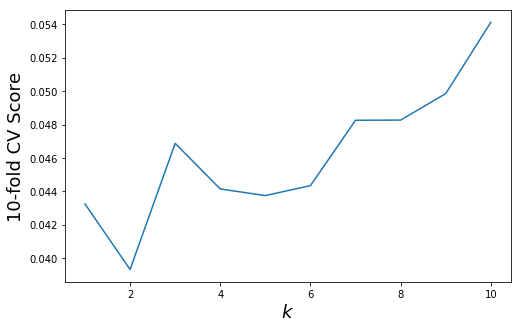

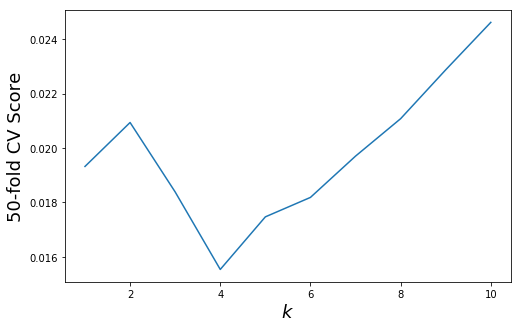

In [9]:
from sklearn.model_selection import cross_val_score

np.random.seed(666)
n = 50
X = np.sort(np.random.uniform(size=n))
y = make_y(X)

for cv in [3, 5, 10, 50]:
    scores = [] # Collect scores here for k=1,...,10
    for k in range(1, 11):
        R = KNeighborsRegressor(n_neighbors=k)
        scores.append(cross_val_score(R, X.reshape(-1, 1), y, scoring='neg_mean_squared_error', cv=cv))
    scores = np.array(scores)

    np.mean(scores, axis=1)
    
    plt.figure(figsize=(8, 5))
    plt.xlabel("$k$", fontsize=18)
    plt.ylabel(f"{cv}-fold CV Score", fontsize=18)
    plt.plot(range(1, 11), -np.mean(scores, axis=1))
    plt.show()

The 50-fold CV score graph looks just like the LOOCV graph from the previous activity.